In [1]:
from scipy.signal import butter, filtfilt

In [2]:
def bandpass_filter(signal, fs, lowcut=0.5, highcut=5.0, order=2):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')
    return filtfilt(b, a, signal)

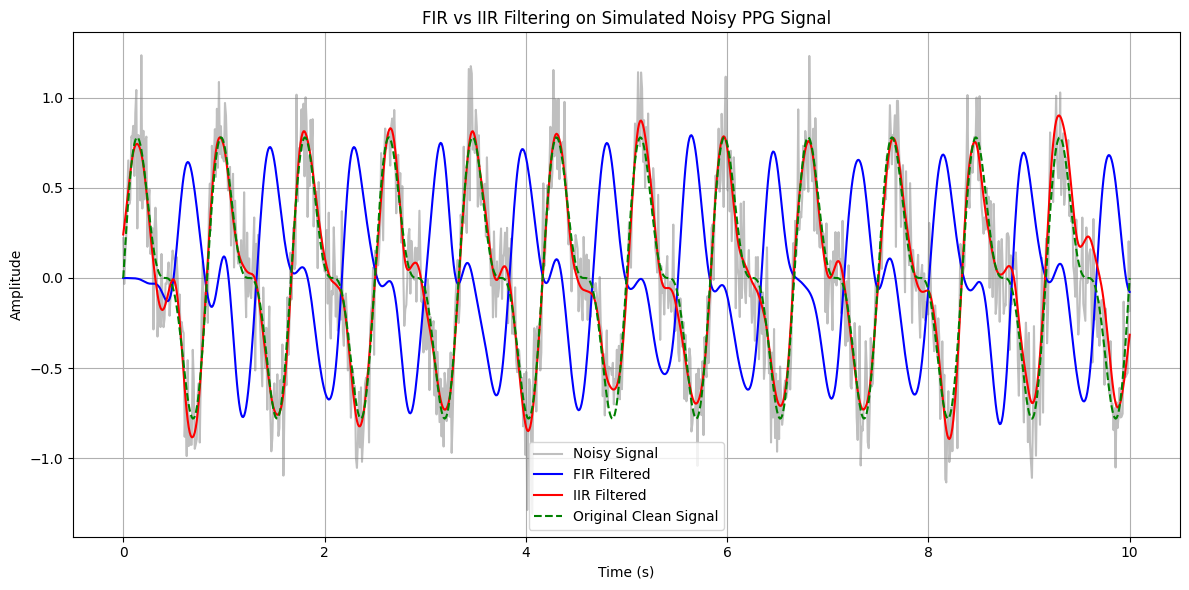

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, lfilter, firwin

# Simulate a sample PPG-like signal with noise
fs = 100  # Sampling rate (Hz)
t = np.linspace(0, 10, 10 * fs)  # 10 seconds
ppg_clean = 0.6 * np.sin(2 * np.pi * 1.2 * t) + 0.3 * np.sin(2 * np.pi * 2.4 * t)
noise = 0.2 * np.random.randn(len(t))
ppg_noisy = ppg_clean + noise

# FIR Filter Design
fir_order = 101
fir_coeff = firwin(fir_order, [0.5, 5], pass_zero=False, fs=fs)
ppg_fir = lfilter(fir_coeff, 1.0, ppg_noisy)

# IIR Filter Design (Butterworth)
iir_order = 2
b, a = butter(iir_order, [0.5 / (fs / 2), 5 / (fs / 2)], btype='band')
ppg_iir = filtfilt(b, a, ppg_noisy)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, ppg_noisy, color='gray', alpha=0.5, label='Noisy Signal')
plt.plot(t, ppg_fir, color='blue', label='FIR Filtered')
plt.plot(t, ppg_iir, color='red', label='IIR Filtered')
plt.plot(t, ppg_clean, color='green', linestyle='--', label='Original Clean Signal')
plt.title('FIR vs IIR Filtering on Simulated Noisy PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()